# Tree-Based Methods
### Aprendizagem Automática e Ciência de Dados

### Grupo 4
### Dinis Carraça Nº14058 & José Feiteira Nº14300

### AVALIAR ATRAVÉS DA MATRIZ DE CONFUSÃO PARA ALÉM DAS OUTRAS MÉTRICAS

In [1]:
%reset -f

## Requirements

In [2]:
!pip install -r requirements.txt


  Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pydot-3.0.2-py3-none-any.whl.metadata (10 kB)
Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached pydot-3.0.2-py3-none-any.whl (35 kB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.4.0

   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
    Uninstalling numpy-2.4.0:
   -------------------- ------------------- 1/2 [numpy]
      Successfully uninstalled numpy-2.4.0
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2

  You can safely remove it manually.
  You can safely remove it manually.


## Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score

from io import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report,recall_score, accuracy_score, precision_score

#import xgboost as xgb


## 0. Operações Gerais

In [5]:
df = pd.read_csv('df_group4_classe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_active_users_per_1k       255 non-null    float64
 1   avg_session_duration            255 non-null    float64
 2   screens_per_session             255 non-null    float64
 3   conversion_rate                 255 non-null    float64
 4   retention_30d                   255 non-null    float64
 5   crash_rate_per_1k               255 non-null    float64
 6   avg_latency_ms                  255 non-null    float64
 7   support_tickets_per_1k_users    255 non-null    float64
 8   bug_fix_time_days               255 non-null    float64
 9   deployment_frequency_per_month  255 non-null    float64
 10  nps_score                       255 non-null    float64
 11  app_store_rating                255 non-null    float64
 12  revenue_per_user                255 

In [6]:
df.head

<bound method NDFrame.head of      daily_active_users_per_1k  avg_session_duration  screens_per_session  \
0                     1.365073              0.767327             0.261780   
1                     0.014407             -0.053756            -0.834279   
2                    -0.794565             -1.364828            -0.794455   
3                    -0.025550             -0.712952            -0.362806   
4                    -0.008756              0.934050             1.951810   
..                         ...                   ...                  ...   
250                  -0.564947             -0.577750             0.066958   
251                   0.195084              0.137976            -0.233007   
252                  -0.464582              0.490636             0.161419   
253                   0.210654             -0.252353             0.001949   
254                   0.708200              1.074918            -0.054928   

     conversion_rate  retention_30d  crash_ra

In [7]:
x = df.drop(columns =['classe'])
y = df['classe'] # Output

In [8]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state = 42, stratify = y)

In [9]:
def avaliar_modelo(modelo, x_teste, y_teste):
    y_predi = modelo.predict(x_teste)
    
    print("Matriz de confusão:")
    print(confusion_matrix(y_teste, y_predi))
    print("\nMétricas:")
    print(f"Accuracy : {accuracy_score(y_teste, y_predi):.4f}")
    print(f"Precision: {precision_score(y_teste, y_predi, average='weighted'):.4f}")
    print(f"Recall   : {recall_score(y_teste, y_predi, average='weighted'):.4f}")
    #print(f"F1-score : {f1_score(y_test, y_pred, average='weighted'):.4f}")
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))
    

## 1. Árvore de Decisão

Resultados Decision Tree
Matriz de confusão:
[[ 4  0  0  3  2]
 [ 0 11  5  1  1]
 [ 2  3 12  0  3]
 [ 2  2  2  9  0]
 [ 0  1  6  3  5]]

Métricas:
Accuracy : 0.5325
Precision: 0.5325
Recall   : 0.5325


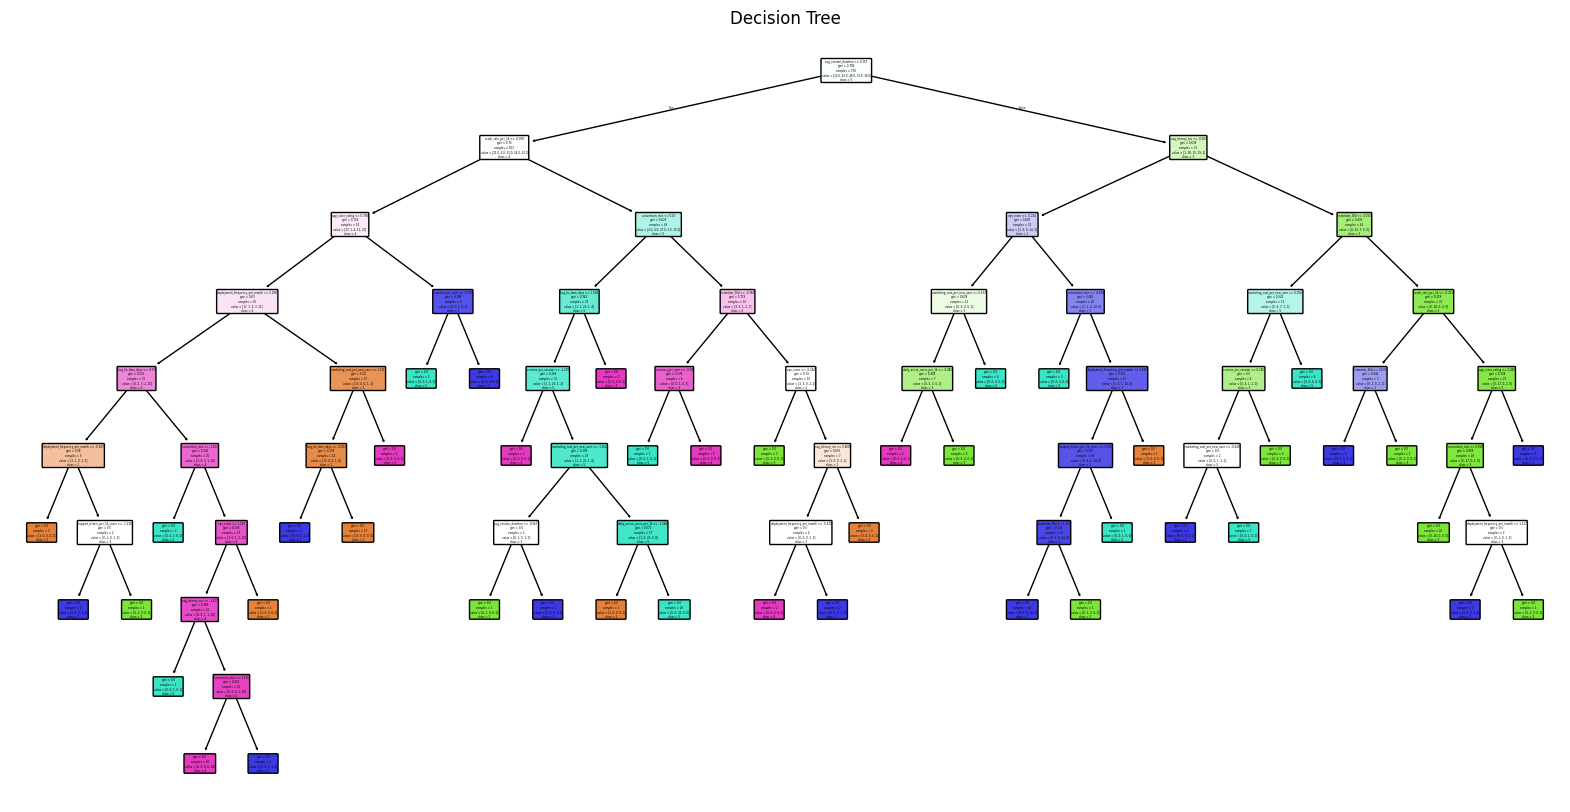

In [10]:
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(x_treino, y_treino)

print("Resultados Decision Tree")
avaliar_modelo(decision_tree, x_teste, y_teste)

plt.figure(figsize=(20,10))
plot_tree(
    decision_tree,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()


Após analisarmos os resultados gerados, chegamos a algumas conclusões:
- A Árvore de Decisão obteve uma accuracy de ~53%, com valores semelhantes de precision e recall, indicando desempenho equilibrado, porém limitado;
- Apesar disso pela análise da matriz de confusão, notamos que existe uma boa destribuição nas previsões das classes, isto é, os valores da diagonal estão todos perto uns dos outros, este facto justifica o baixo valor obtido na accuracy;
- 

## 2. Random Forest

Resultados Ramdom Forest
Matriz de confusão:
[[ 6  0  0  1  2]
 [ 0 14  1  1  2]
 [ 0  1 17  1  1]
 [ 0  0  2 13  0]
 [ 1  1  3  1  9]]

Métricas:
Accuracy : 0.7662
Precision: 0.7709
Recall   : 0.7662


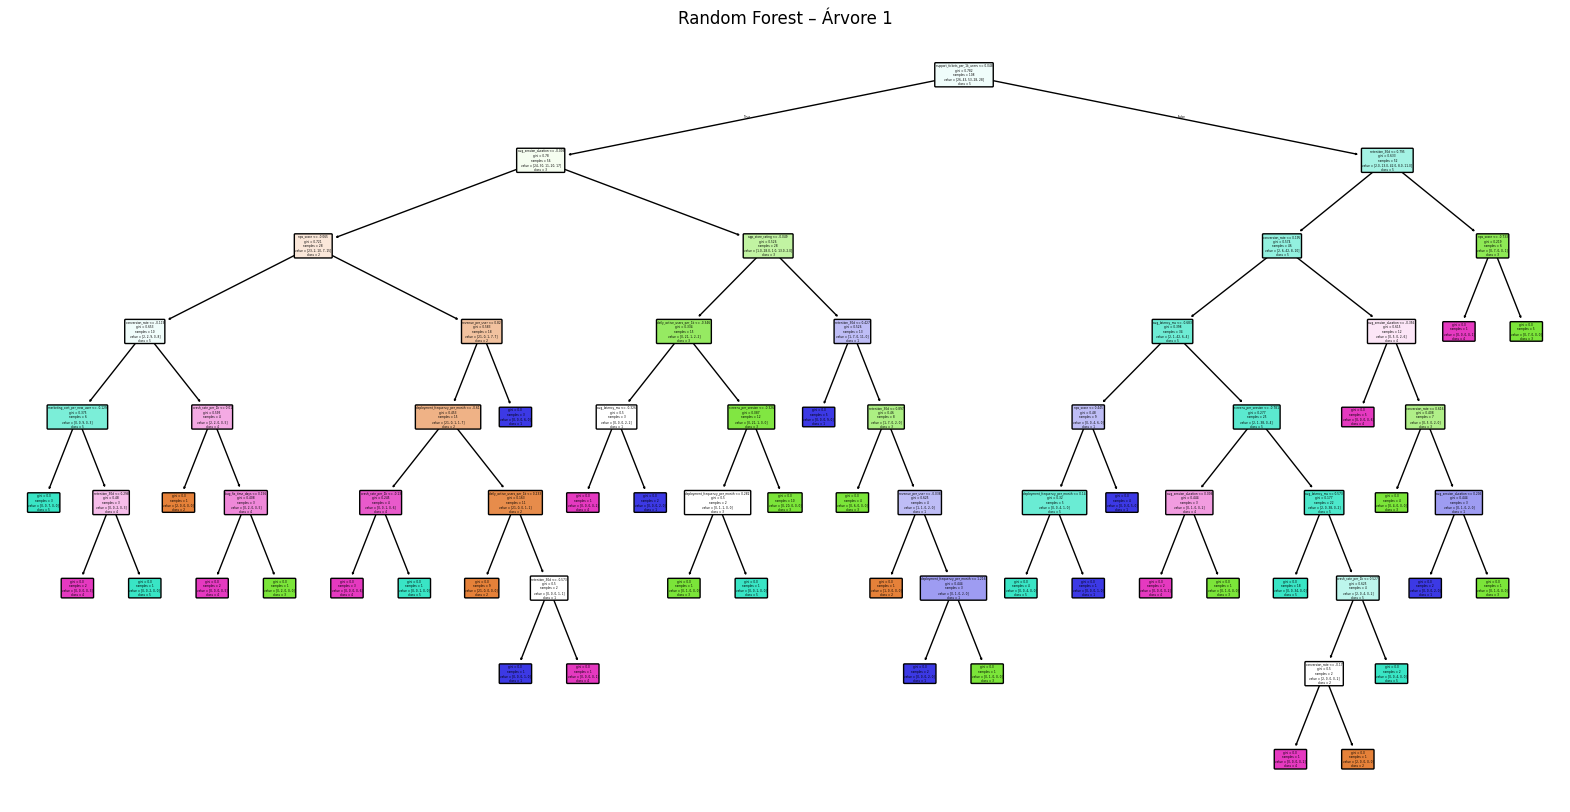

In [11]:
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(x_treino, y_treino)

print("Resultados Ramdom Forest")
avaliar_modelo(random_forest, x_teste, y_teste)

estimator = random_forest.estimators_[5]

plt.figure(figsize=(20,10))
plot_tree(
    estimator,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Random Forest – Árvore 1")
plt.savefig("random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

Dos resultados acima conseguimos retirar as seguintes observações:

- O Random Forest obteve uma accuracy de ~76%, superando claramente o modelo anterior;
- É notável uma melhoria nas métricas de precision e recall;
- A matriz de confusão evidencia uma boa distribuição das previsões, 3 das 5 classes têm valores pouco distantes;
- Assim, as random forestt unem o melhor dos dois mundos, boas métricas e boa distribuição das previsões

## 3. Bagging

Resultados Bagging
Matriz de confusão:
[[ 8  0  0  1  0]
 [ 0 12  2  1  3]
 [ 0  2 16  1  1]
 [ 0  0  4 11  0]
 [ 1  1  3  2  8]]

Métricas:
Accuracy : 0.7143
Precision: 0.7209
Recall   : 0.7143


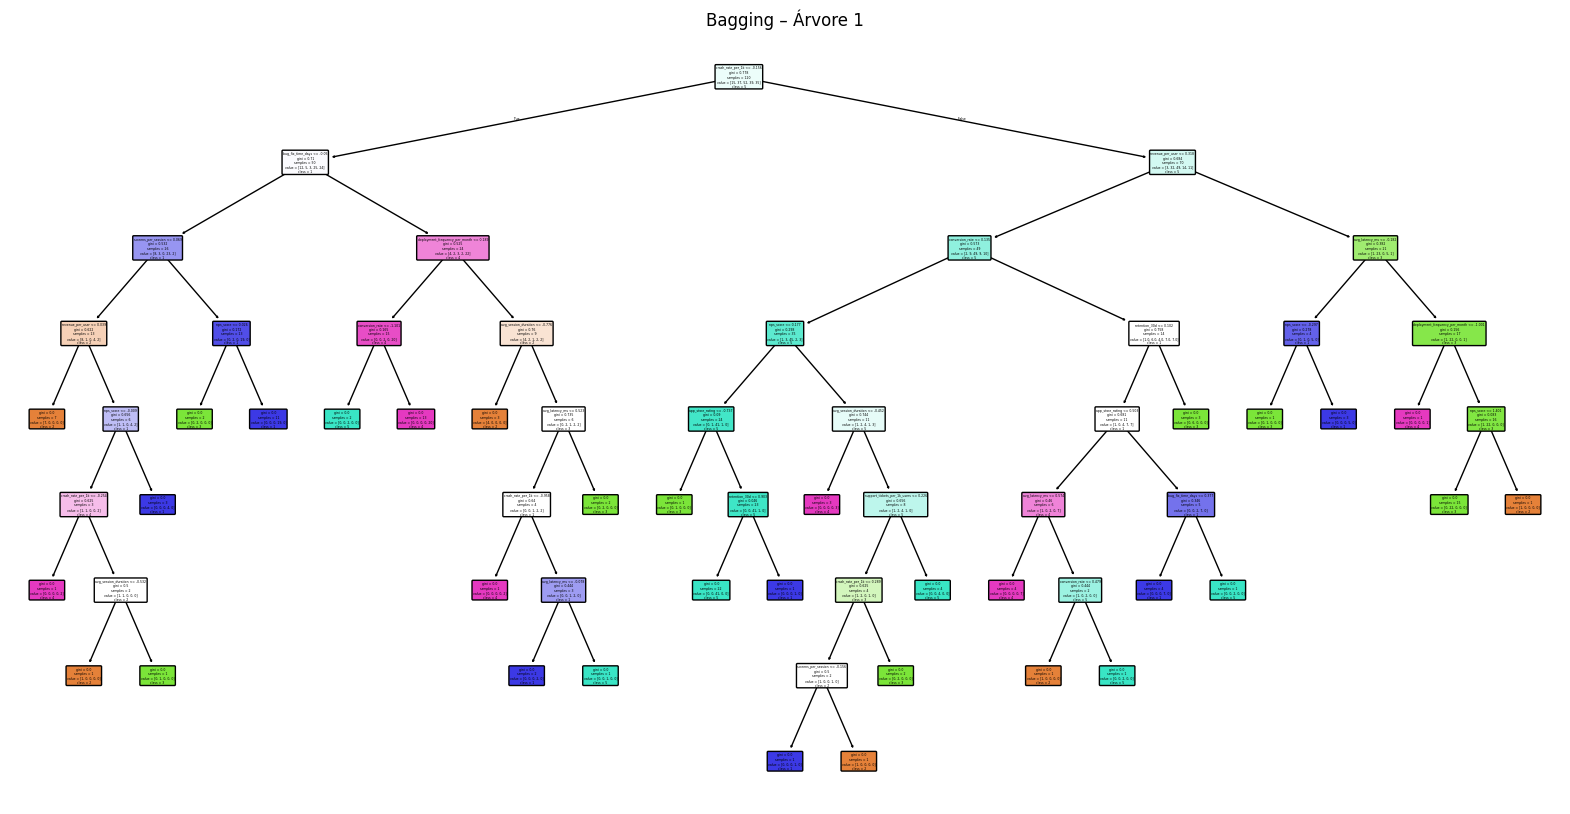

In [12]:
bagging = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(x_treino, y_treino)

print("Resultados Bagging")
avaliar_modelo(bagging, x_teste, y_teste)

estimator = bagging.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(
    estimator,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Bagging – Árvore 1")
plt.savefig("bagging.png", dpi=300, bbox_inches='tight')
plt.show()

As conclusões obtidas foram as seguintes:
- Obteve uma accuracy de ~71%, ligeira perda face às random forest;
- No entanto apresenta uma melhor distribuição na matriz de confusão;
- Assim, podemos afirmar que o método está em par com o random forest;

## 4. Boosting

### 4.1 AdaBoost

Resultados AdaBoost
Matriz de confusão:
[[ 6  0  1  0  2]
 [ 0 12  0  1  5]
 [ 0  2 12  2  4]
 [ 0  1  2 12  0]
 [ 2  2  1  1  9]]

Métricas:
Accuracy : 0.6623
Precision: 0.6812
Recall   : 0.6623


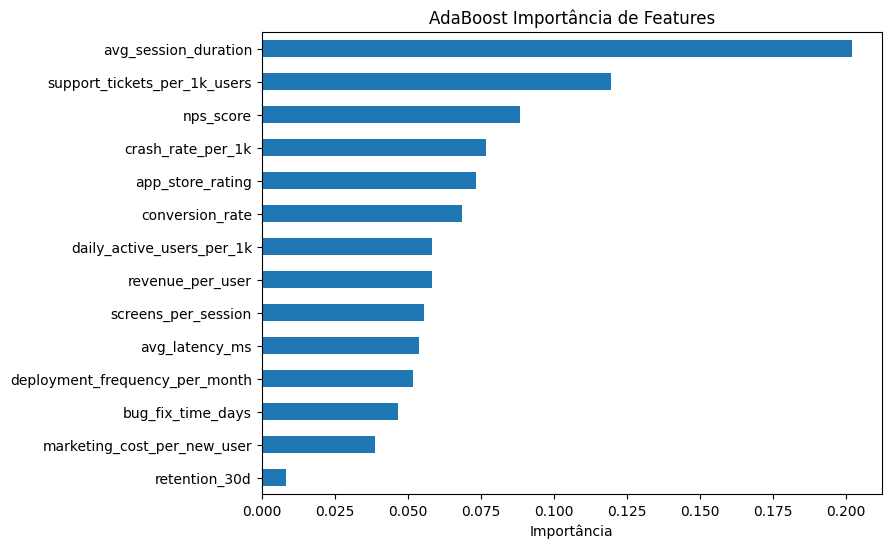

In [13]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42,algorithm='SAMME')
adaboost.fit(x_treino, y_treino)

print("Resultados AdaBoost")
avaliar_modelo(adaboost, x_teste, y_teste)

importancia = adaboost.feature_importances_
feat_imp = pd.Series(importancia, index=x.columns).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.title("AdaBoost Importância de Features")
plt.xlabel("Importância")
plt.savefig("adaboost.png", dpi=300, bbox_inches='tight')
plt.show()

As observações retiradas foram as seguintes:
- Accuracy de ~66%, com valores equilibrados de precision e recall;
- A matriz de confusão mostra, até ao momento, a melhor distribuição nos valores da diagonal;
- O AdaBoost apresenta desempenho competitivo entre os métodos avaliados, mesmo tendo métricas com menor valor.

### 4.2 Gradient Boosting

Resultados Gradient Boosting
Matriz de confusão:
[[ 3  0  1  1  4]
 [ 0 15  2  0  1]
 [ 0  1 13  3  3]
 [ 0  0  3 12  0]
 [ 2  1  1  1 10]]

Métricas:
Accuracy : 0.6883
Precision: 0.6910
Recall   : 0.6883


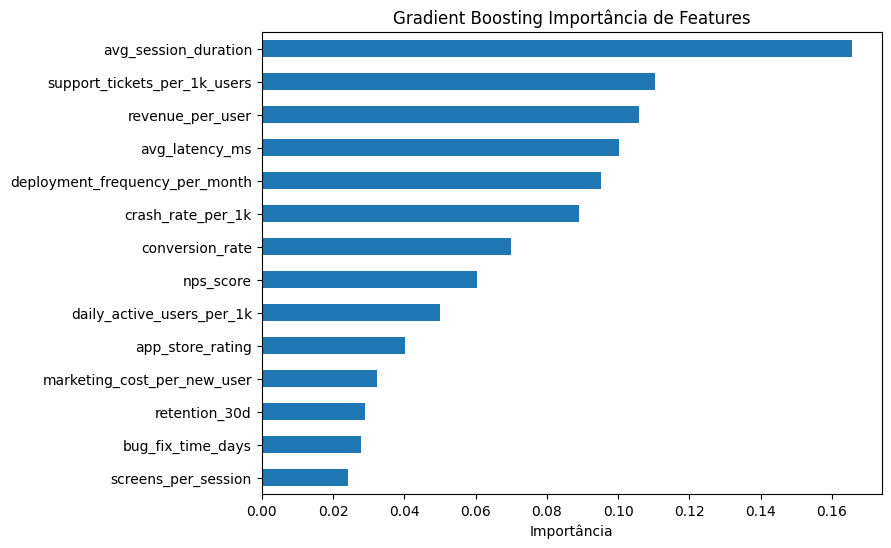

In [14]:
gradiente = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradiente.fit(x_treino, y_treino)

print("Resultados Gradient Boosting")
avaliar_modelo(gradiente, x_teste, y_teste)

importancias = gradiente.feature_importances_
feat_imp = pd.Series(importancias, index=x.columns).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.title("Gradient Boosting Importância de Features")
plt.xlabel("Importância")
plt.savefig("gradient_boosting.png", dpi=300, bbox_inches='tight')
plt.show()

Conclusões obtidas pelos resultados:
- Obteve uma accuracy de ~68%, com valores equilibrados de precision e recall.
- Observa-se um grande desfalque na previsão da classe 0 na matriz de confusão.
- Assim, apesar dos valores competitivos das métricas, a fraca distribuição na matriz de confusão pode levar a piores resultados comparando com os métodos anteriores.

## 5. Conclusões

Depois de realizados todos os métodos acima chegamos às seguintes conclusões gerais:

1. Um alto valor de accuracy pode induzir em erro, havendo então a necessidade de analisar a matriz de confusão de cada;
2. Os métodos que apresentaram melhor desempenho foram, Bagging e Boosting, mais especificamente o AdaBoost;
3. De entre estes dois o Adaboost tem o melhor balanço entre Métricas e Matriz de Confusão;

Assim, chegamos à conclusão de que, possivelmente, o AdaBoost será a melhor alternativa para suprir as nossas necessidades. Apesar disso vamos contabilizar também o Bagging de modo a tornar a nossa análise mais abragente.

avg_session_duration
Users who stay longer are fundamentally different from users who don’t

Session duration captures value realization, not just activity

support_tickets_per_1k_users
Support volume strongly distinguishes outcomes


Fim
Users who consistently find value in each session — staying longer, encountering fewer issues, and needing less help — are much more likely to lead to positive business outcomes than users who simply show up often or spend more once

Final takeaway (board-level sentence)

“Our strongest predictor of success is how much value users get in each session, not how many users we acquire or how much they spend initially.”

## 4.3 XGBoost (Não funciona sem umas cenas todas maradas)

In [50]:
xgboost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,use_label_encoder=False)
xgboost.fit(x_treino, y_treino)

print("Resultados XGBoost")
avaliar_modelo(xgboost, x_teste, y_teste)

xgb.plot_importance(xgboost)
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]